# 4.10: Coding Etiquette & Excel Reporting

## Import Libraries 

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data 

In [ ]:
# Specify the path to the pickle file
path = r'C:\Users\virue\06-2023 Instacart Basket Analysis'

# Define the path to the pickle file
df_merged_clean = os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_clean.pkl')


df_customers_clean = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

# Read the data from the pickle file into merged_df
merged_df = pd.read_pickle(df_merged_clean)

# Merge the DataFrames
merged_df = merged_df.merge(df_customers_clean, on='user_id', how='inner')


In [7]:
# column list
columns_list = merged_df.columns.tolist()
print(columns_list)

['Unnamed: 0', 'order_id', 'user_id', 'eval_set', 'order_number', 'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id', 'department_id', 'prices', 'source_column', 'max_order', 'loyalty_flag', 'average_price', 'spending_flag', 'median_prior_orders', 'order_frequency_flag', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income']


In [8]:
merged_df['order_frequency_flag'].head()

0    non_frequent
1    non_frequent
2    non_frequent
3    non_frequent
4    non_frequent
Name: order_frequency_flag, dtype: object

### Task 1-3A The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 
   #### https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [9]:
# Define dictionary mapping states to regions (update this dictionary with all your states)

state_to_region = {
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',  
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
}

# Define a function to map states to regions
def map_state_to_region(state):
    return state_to_region.get(state, 'Unknown')

# Apply the mapping and create a 'Region' column in merged_df
merged_df['Region'] = merged_df['STATE'].apply(map_state_to_region)


### Task 1-3B Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [10]:
# Create a cross-tabulation of Region and Spending_Flag
cross_tab = pd.crosstab(merged_df['Region'], merged_df['spending_flag'])

# Calculate proportions or percentages by specifying normalize='index' or 'columns'
cross_tab_percent = pd.crosstab(merged_df['Region'], merged_df['spending_flag'], normalize='index')

# Print the cross-tabulation and percentages
print("Cross-Tabulation:")
print(cross_tab)

print("\nCross-Tabulation with Percentages:")
print(cross_tab_percent)


Cross-Tabulation:
spending_flag  high spender  low spender
Region                                  
Midwest              156129      7447681
Northeast            108343      5620004
South                210182     10591428
West                 160807      8139638

Cross-Tabulation with Percentages:
spending_flag  high spender  low spender
Region                                  
Midwest            0.020533     0.979467
Northeast          0.018913     0.981087
South              0.019458     0.980542
West               0.019373     0.980627


### Task 1-4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [11]:
# Step 1 Calculate the number of orders per customer 

orders_per_customer = merged_df['user_id'].value_counts().reset_index()

orders_per_customer.columns = ['user_id', 'order_count']

In [12]:
# Step 2 Create an exclusion flag for low-activity customers (customers with less than 5 orders)

exclusion_threshold = 5 

orders_per_customer ['exclude_customer'] =orders_per_customer ['order_count'] < exclusion_threshold

In [13]:
# Step 3  Merge the exclusion flag back to the main Data frame 

merged_df = merged_df.merge(orders_per_customer[['user_id', 'exclude_customer']], on='user_id', how='left')

In [14]:
# Step 4: Filter the data to exclude low-activity customers

filtered_df = merged_df[merged_df['exclude_customer'] != True]

In [15]:
# export this sample of the average spending for each region 

filtered_df.to_csv('filtered_sample.csv', index=False)

### Task 1-5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 

### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

### You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

### (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [16]:
 # Define a function to categorize customers into profiles 
def categorize_customer(row):
    if row['Age'] <= 30 and row['income'] > 50000 and row['n_dependants'] == 0:
        return 'Single Adult'
    elif row['Age'] <= 30 and row['n_dependants'] > 0:
        return 'Young Parent'
    elif row['Age'] > 60:
        return 'Retiree/Senior'
    else:
        return 'Other'    

# Apply the categorization function to create the 'Customer_Profile' column in merged_df
merged_df['Customer_Profile'] = merged_df.apply(categorize_customer, axis=1)


In [17]:
# Print the DataFrame with the new 'Customer_Profile' column
print(merged_df[['Age', 'income', 'n_dependants', 'Customer_Profile']])

          Age  income  n_dependants Customer_Profile
0          31   40423             3            Other
1          31   40423             3            Other
2          31   40423             3            Other
3          31   40423             3            Other
4          31   40423             3            Other
...       ...     ...           ...              ...
32434207   25   53755             0     Single Adult
32434208   22   46151             3     Young Parent
32434209   22   46151             3     Young Parent
32434210   22   46151             3     Young Parent
32434211   22   46151             3     Young Parent

[32434212 rows x 4 columns]


### Task 1-6 Create an appropriate visualization to show the distribution of profiles.

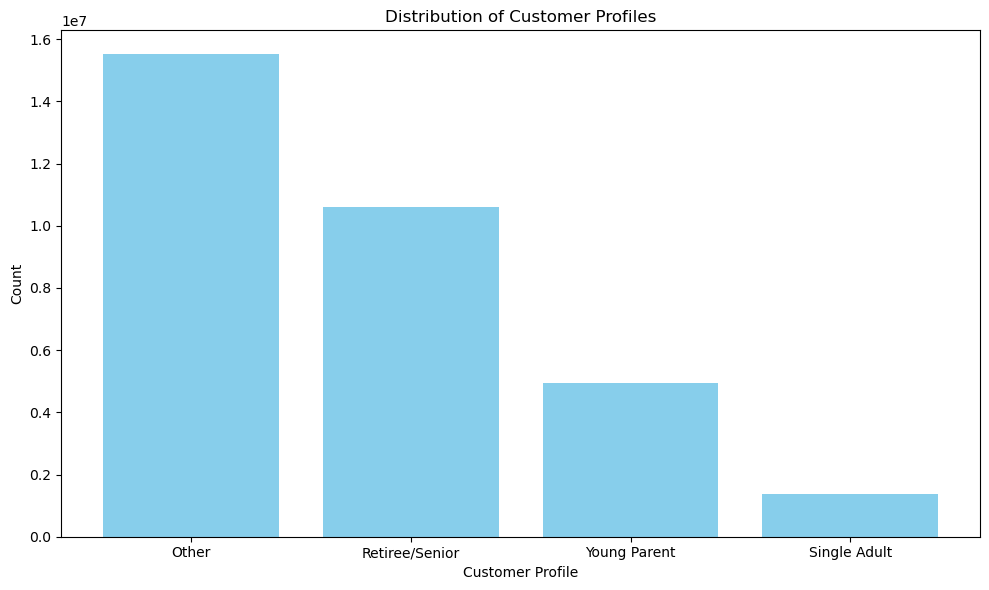

In [18]:
# Count the occurrences of each customer profile
profile_counts = merged_df['Customer_Profile'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(profile_counts.index, profile_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.title('Distribution of Customer Profiles')


# Display the plot
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

### Task 1-7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [19]:
# List all column names in the DataFrame
print(merged_df.columns)

Index(['Unnamed: 0', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'source_column',
       'max_order', 'loyalty_flag', 'average_price', 'spending_flag',
       'median_prior_orders', 'order_frequency_flag', 'First Name', 'Surnam',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'Region', 'exclude_customer', 'Customer_Profile'],
      dtype='object')


In [20]:
# Show the contents of the 'order_frequency_flag' column
column_contents = merged_df['order_frequency_flag']
print(column_contents)


0                non_frequent
1                non_frequent
2                non_frequent
3                non_frequent
4                non_frequent
                  ...        
32434207    frequent_customer
32434208         non_frequent
32434209         non_frequent
32434210         non_frequent
32434211         non_frequent
Name: order_frequency_flag, Length: 32434212, dtype: object


In [21]:
# Create a function to calculate mode

# Create a function to calculate mode
def calculate_mode(arr):
    mode, _ = scipy.stats.mode(arr, keepdims=True)
    return mode[0]

# Aggregate max, mean, median, mode, and min of usage frequency ('days_since_prior_order') 
# and expenditure ('prices') by 'Customer_Profile'
agg_df = merged_df.groupby('Customer_Profile').agg({
    'days_since_prior_order': ['max', 'mean', 'median', calculate_mode, 'min'],
    'prices': ['max', 'mean', 'median', calculate_mode, 'min']
}).reset_index()

# Rename the columns for clarity
agg_df.columns = ['Customer_Profile', 'Max_Usage_Frequency', 'Mean_Usage_Frequency',
                  'Median_Usage_Frequency', 'Mode_Usage_Frequency', 'Min_Usage_Frequency',
                  'Max_Expenditure', 'Mean_Expenditure', 'Median_Expenditure', 'Mode_Expenditure', 'Min_Expenditure']

# Display the aggregated DataFrame
print(agg_df)


  Customer_Profile  Max_Usage_Frequency  Mean_Usage_Frequency  \
0            Other                 30.0             11.112593   
1   Retiree/Senior                 30.0             11.083596   
2     Single Adult                 30.0             11.161308   
3     Young Parent                 30.0             11.105879   

   Median_Usage_Frequency  Mode_Usage_Frequency  Min_Usage_Frequency  \
0                     8.0                   7.0                  0.0   
1                     8.0                   7.0                  0.0   
2                     8.0                   7.0                  0.0   
3                     8.0                   7.0                  0.0   

   Max_Expenditure  Mean_Expenditure  Median_Expenditure  Mode_Expenditure  \
0          99999.0         11.949298                 7.4              12.3   
1          99999.0         11.847033                 7.4              12.3   
2          99999.0         13.514161                 7.7              12.3   
3

### Task 1-8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

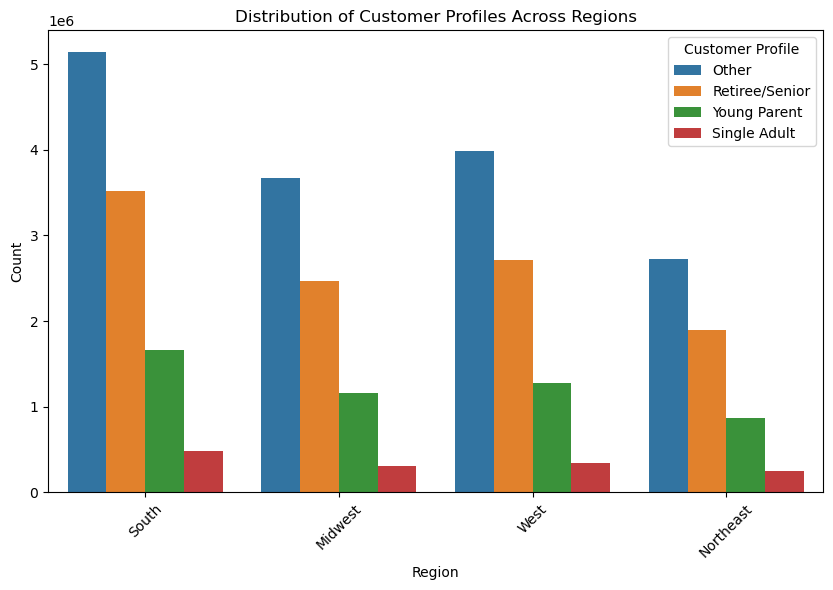

In [22]:
# Create a bar chart to compare customer profiles with regions

plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Region', hue='Customer_Profile')
plt.title('Distribution of Customer Profiles Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Customer Profile', loc='upper right')
plt.xticks(rotation=45)
plt.show()


### 1-9 Produce suitable charts to illustrate your results and export them in your project folder.

In [23]:
# Create Heatmap of average values for each combination of customer progiles and regions 


# Group by 'Customer_Profile' and 'Region' and calculate the average values

avg_data = merged_df.groupby(['Customer_Profile', 'Region'])[['income', 'Age']].mean().reset_index()


C:\Users\virue\AppData\Local\Temp\ipykernel_15640\2671743932.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = avg_data.pivot('Customer_Profile', 'Region', 'income')


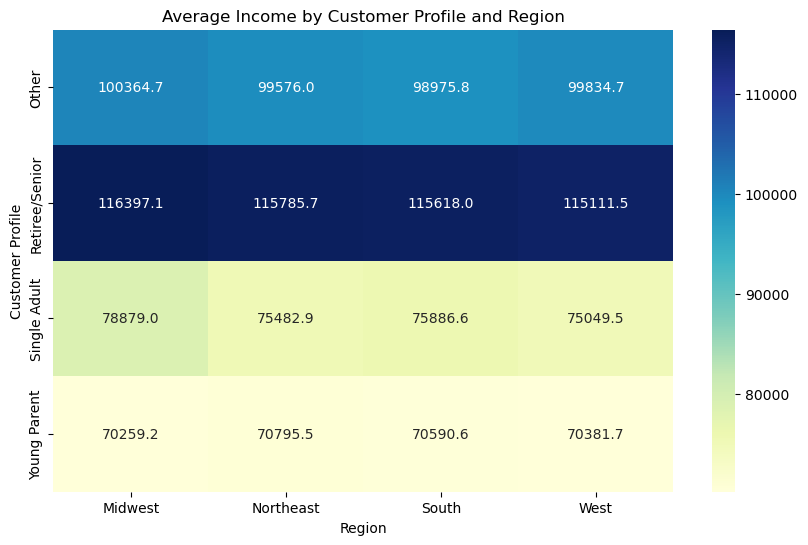

In [24]:
# Create a pivot table of average values

pivot_table = avg_data.pivot('Customer_Profile', 'Region', 'income')

# Create the heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Average Income by Customer Profile and Region')
plt.xlabel('Region')
plt.ylabel('Customer Profile')

# Show the heatmap
plt.show()


### This heatmap shows the average income values for each combination fo customer profiles and region combinations. 

In [ ]:
# Export the Distribution of customer profiles across regions bar chart 

# Define the OneDrive folder path
onedrive_path = r'C:\Users\virue\OneDrive\Desktop\Will CareerFoundry\Achievement 4\Final Presentation\4.10 Chart illustrations\\'

# Save the bar chart to your OneDrive folder
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Region', hue='Customer_Profile')
plt.title('Distribution of Customer Profiles Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Customer Profile', loc='upper right')
plt.xticks(rotation=45)
plt.savefig(onedrive_path + 'customer_profiles_distribution.png', bbox_inches='tight')
